In [1]:
import numpy as np
import gibbsPy as gp
import scipy.stats as stats
import scipy.stats.distributions
import corner
import matplotlib.pyplot as plt

$\theta$

# Coin Flipping Example

Here we want to use GibbsPy to sample the posterior distribution of the probability that a given coin will become heads when flipped. To do this we set up a Beta prior with A=1, B=1 (i.e. a uniform uninformative prior) and a Bernoulli likliehood given a set of Data. From this we then can analyticaly write the condtional distribution:

P $\big($ $\theta_{i}$ | ${\theta_{j $\neq$ i}$ , D $\big)$ = beta $\big($ $\theta_{i}$ | $\alpha$ = $z_{i}$ + $a_{i}$, $\beta$ = $N_{i}$ - $z_{i}$ + $b_{i}$ $\big)$



In [2]:
params = [r'$\theta_{1}$', r'$\theta_{2}$', r'$\theta_{3}$', r'$\theta_{4}$']
dim = 4
nobs = 100
def generate_coinflip_data(N, D):
    size = (N, D)
    data = np.zeros(size)
    theta_trues = np.random.uniform(0.,1., size=D)
    for i in range(D):
        data[:,i] = np.random.choice((1,0), size=N, p=(theta_trues[i], 1-theta_trues[i]))
    return data, theta_trues

In [3]:
def conditional_function(pos, idx, data, a=1, b=1, random=None):
    N = len(data[:,idx])
    heads = np.sum(data[:,idx])
    return scipy.stats.distributions.beta.rvs(a+heads, N-heads+b, random_state=random if random is not None else None)

In [4]:
data, thetas = generate_coinflip_data(nobs, dim)
initial_state = np.random.uniform(0,1, size=dim)
sampler = gp.sampler.Sampler(dim, params, initial_state=initial_state, data=data, cond_fct=conditional_function)
sampler.run_gibs(100000, progress=True)
chain = sampler.get_chain()

100%|██████████| 100000/100000 [00:31<00:00, 3174.70it/s]


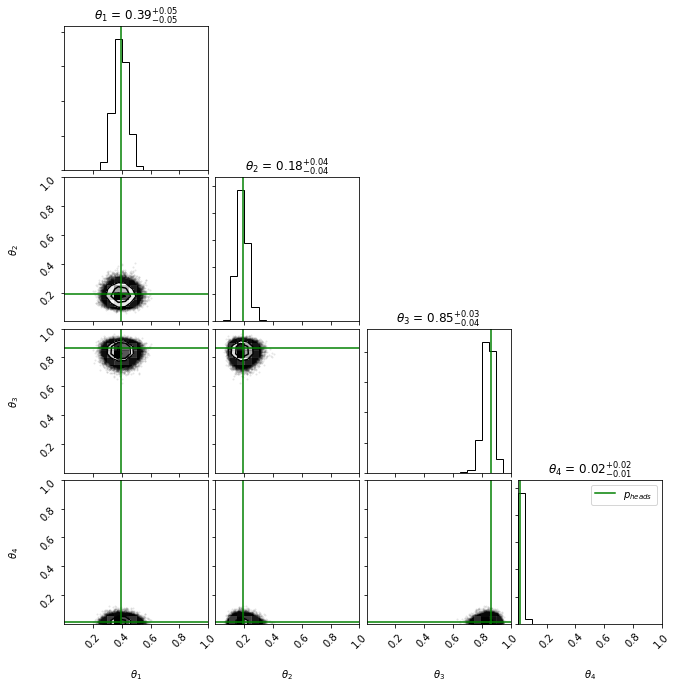

In [7]:
fig = corner.corner(chain, range=[(0.,1.), (0.,1.), (0.,1.), (0.,1.)], labels=params, show_titles=True,
              quantities=(0.05,0.95))
# Extract the axes
axes = np.array(fig.axes).reshape((dim, dim))
# Loop over the diagonal
for i in range(dim):
    ax = axes[i, i]
    ax.axvline(thetas[i], color="g", label=r'$p_{heads}$')
    plt.legend()
# Loop over the histograms
for yi in range(dim):
    for xi in range(yi):
        ax = axes[yi, xi]
        ax.axvline(thetas[xi], color="g", label=r'$p_{heads}$')
        ax.axhline(thetas[yi], color="g", label=r'$p_{heads}$')
        plt.legend()
plt.show()